In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import collections
from collections import defaultdict
import freqopttest.glo as glo
from pathlib import Path
import sys
import time
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import pickle

In [19]:
t7Drive = '/media/ak/T7'
mainPath = os.path.join(t7Drive, 'August11th2022Experiments/')
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'
HurstDicts = os.path.join(mainPath, 'HurstDicts')
symbols = os.listdir(HurstDicts)
symbolIdx = 1
print(symbols[symbolIdx])
symbolDict = os.path.join(HurstDicts, symbols[symbolIdx])
HurstFiles = sorted([f for f in os.listdir(symbolDict) if str('Hurst') in f])
RhoFiles = sorted([g for g in os.listdir(symbolDict) if str('Rho') in g])

FB1


In [20]:
RhoDict = dict()
n = []
for testFileIdx, fileChoice in enumerate(RhoFiles):
    RhoIdxFileLoc = os.path.join(symbolDict, fileChoice)
    rhoDictionary = pd.read_pickle(RhoIdxFileLoc)
    firstKey = list(rhoDictionary.keys())[0]
    RhoDict[firstKey] = rhoDictionary[firstKey]


In [21]:
rho_dfs = pd.DataFrame.from_dict(RhoDict)
n_values = rhoDictionary['n']
rho = rho_dfs.median(axis=1)
n = n_values


In [22]:

import pandas as pd
import numpy as np
import seaborn as sns

def plot_time_series(df, n, save_plot = False):
    symbol_ ='FB1'
    tick_fontsize =16
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    # Set the font size of the x and y tick labels

    """
    Plots the median and a standard deviation bandwidth around it for each column in the DataFrame.
    """
    median_label='Median' 
    std_label='Std Dev'
    median = df.median(axis=1)
    std = df.std(axis=1)
    x_vals = n
    y_vals = median.values
    sns.lineplot(x=x_vals, y=y_vals, ci='sd')
    upper_band = median + std
    lower_band = median - std
    ax = sns.lineplot(x=x_vals, y=upper_band, color='gray', linewidth=0.5,label=median_label)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    sns.lineplot(x=x_vals, y=lower_band, color='gray', linewidth=0.5)
    plt.xlabel('n', fontsize=14)
    plt.ylabel('$\\rho_{DCCA}$', fontsize=14)
    plt.title('rhoDCCA', fontsize=14)
    plt.ylim(-0.3, 0.3)
    plt.fill_between(x_vals, upper_band, lower_band, color='gray', alpha=0.2, label=std_label)
    plt.legend(loc='best')
    # Save the plot as a high-quality PNG image
    if save_plot:
        plt.tight_layout()
        name = str(symbol_)+'_dcca_correl.png'
        filename = os.path.join(figuresLocation,name )
        plt.savefig(filename, dpi=300)
    # Show the plot
    plt.show()



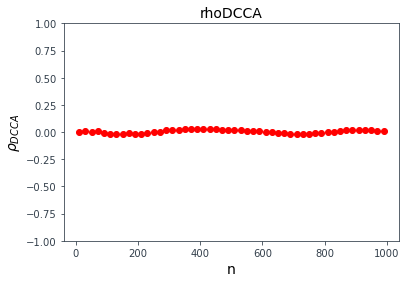

In [23]:
plt.plot(n, rho, 'ro')
plt.ylim(-1, 1)
plt.xlabel('n', fontsize=14)
plt.ylabel('$\\rho_{DCCA}$', fontsize=14)
plt.title('rhoDCCA', fontsize=14)
plt.show()

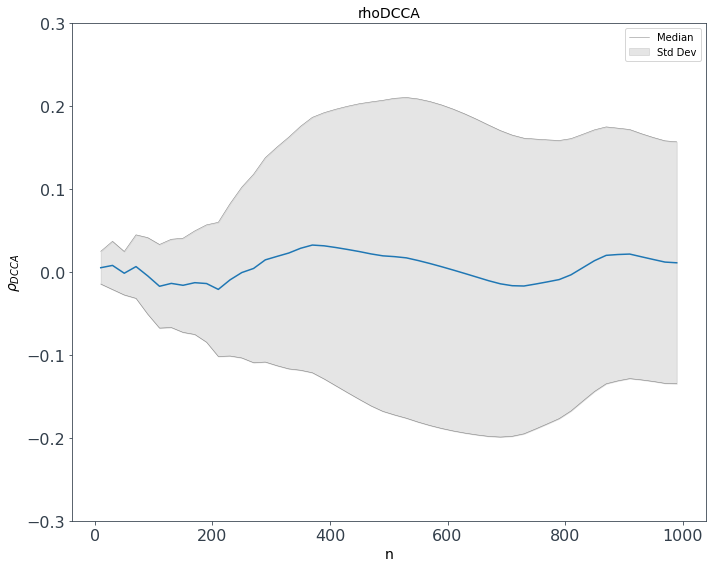

In [24]:
plot_time_series(rho_dfs, n, save_plot=True)

In [ ]:
def plot_time_series(df, n, window_size):
    """
    Plots the median and a rolling standard deviation bandwidth around it for each column in the DataFrame.
    """
    median = df.median(axis=1)
    std = df.rolling(window_size, axis=1, center=True).std().median(axis=1)
    x_vals = n
    y_vals = median.values
    sns.lineplot(x=x_vals, y=y_vals, ci=None)
    upper_band = median + std
    lower_band = median - std
    plt.fill_between(x_vals, upper_band, lower_band, color='gray', alpha=0.2)

In [ ]:
plot_time_series(rho_dfs, n, 8)